# Cleaning Functions

In [33]:
import pandas as pd

def load_data():
    data = pd.read_csv('mbti_1.csv')
    return data


In [34]:
import re

def clean_mbti_text(data):
    label = data['type']
    
    #lowercase
    data['posts'] = data['posts'].apply(lambda x: x.lower()) 

    #personalities_list = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
                          #'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
    personalities_list = ['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
                          'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp']

    #personalities_list = [p.lower() for p in personalities_list]
    
    #remove links
    data['posts'] = data['posts'].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " ")) #links
    
    #remove MBTI personality labels from data['posts']
    for i in range(len(personalities_list)-1):
        data['posts'] = data['posts'].str.replace(personalities_list[i], '')
    
    #remove nonwords
    data['posts'] = data['posts'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))
    
    #remove puncuation
    data['posts'] = data['posts'].apply(lambda x: re.sub(r'[\.+]', ".",x)) 
    
    #remove extra spaces
    data['posts'] = data['posts'].str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ') 
    
    clean = data
    
    return clean

In [35]:
dirty = load_data()
data = load_data()
clean_data = clean_mbti_text(data)

C:\Users\jaypi\AppData\Local\Temp/ipykernel_12648/1939490435.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  data['posts'] = data['posts'].str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


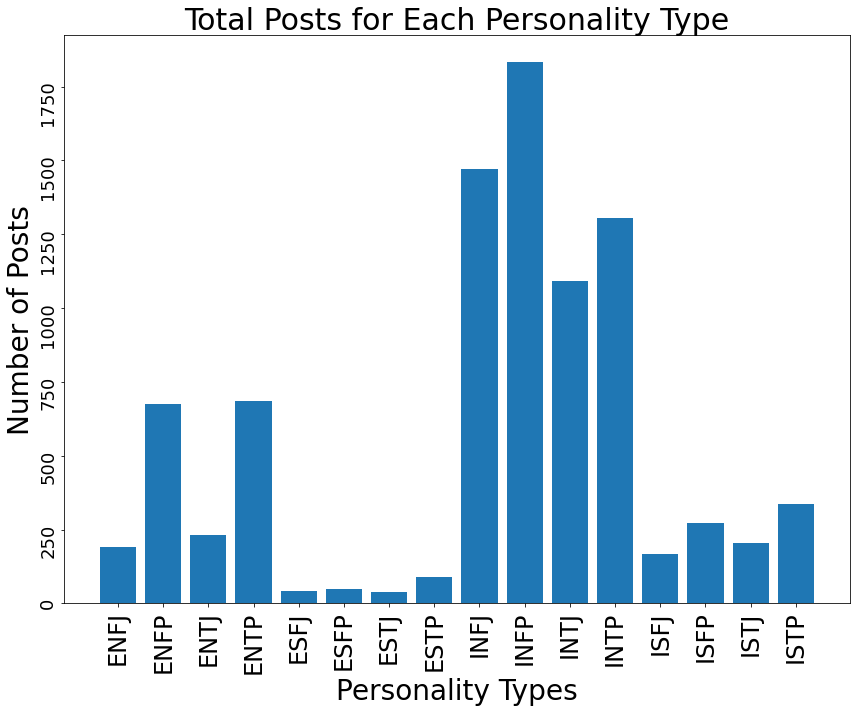

In [36]:
import numpy as np
import matplotlib.pyplot as plt

personalities = np.unique(np.array(dirty['type']))
num_post = dirty.groupby(['type']).count()
plt.bar(personalities, num_post['posts'],)
plt.xlabel('Personality Types', size = 28)
plt.xticks(rotation='vertical', size =24)
plt.yticks(rotation='vertical', size =18)
plt.ylabel('Number of Posts', size = 28)
plt.title('Total Posts for Each Personality Type', size =30)
plt.rcParams["figure.figsize"] = (12,10)
plt.tight_layout()
plt.savefig("perstyp_dist.png")

# Removing Stopwords to show what text looks like

In [37]:
from gensim.parsing.preprocessing import remove_stopwords   

# Function for removing stopwords (kind of unnecessary here, but kept for future resource)
def stopword_removal(row):
    text = row['posts']
    text = remove_stopwords(text)
    return text

# Implement stopword removal on 'text' column of 'data' datafram
clean_data['posts'] = clean_data.apply(stopword_removal, axis=1)

### Distribution of Character Counts per Post (Comparison)

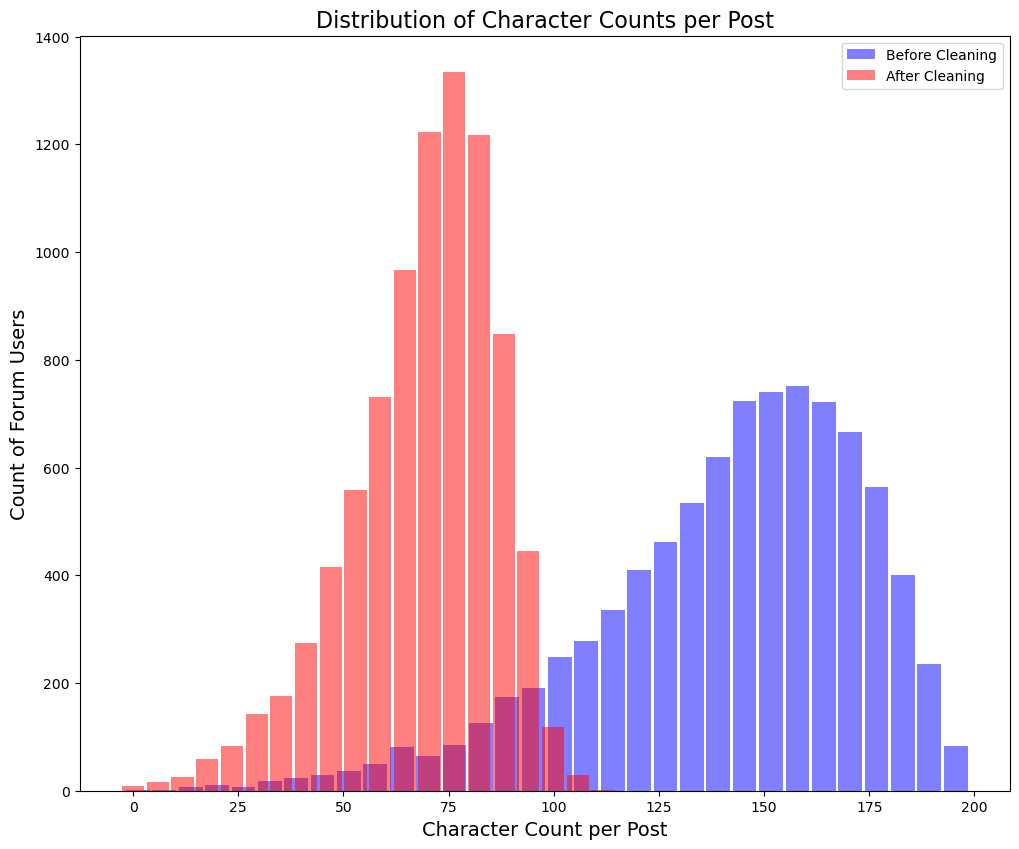

In [41]:
import seaborn as sns

dirty["length_posts"] = dirty["posts"].apply(len) / 50 
clean_data["length_posts"] = clean_data["posts"].apply(len) / 50

fig, ax = plt.subplots(dpi=100)
ax.hist(dirty["length_posts"], align='left', bins = 32, rwidth=0.9, fc=(0, 0, 1, 0.5))
ax.hist(clean_data["length_posts"], align='left', bins=20, rwidth=0.9, fc=(1, 0, 0, 0.5))

ax.set_title("Distribution of Character Counts per Post", fontsize=16)
ax.set_xlabel("Character Count per Post", fontsize=14)
ax.set_ylabel('Count of Forum Users', fontsize=14)
ax.legend(["Before Cleaning", "After Cleaning"])
plt.show()

fig.savefig("character_count_combo.png")

# Mean value of post lengths

In [42]:
avg_dirty = dirty["length_posts"].sum() / len(dirty.index)
avg_clean = clean_data["length_posts"].sum() / len(clean_data.index)
print(avg_dirty)
print(avg_clean)

144.6997925072046
71.99456599423632


# Word Cloud

# Generate wordcloud images for each Myers-Briggs type

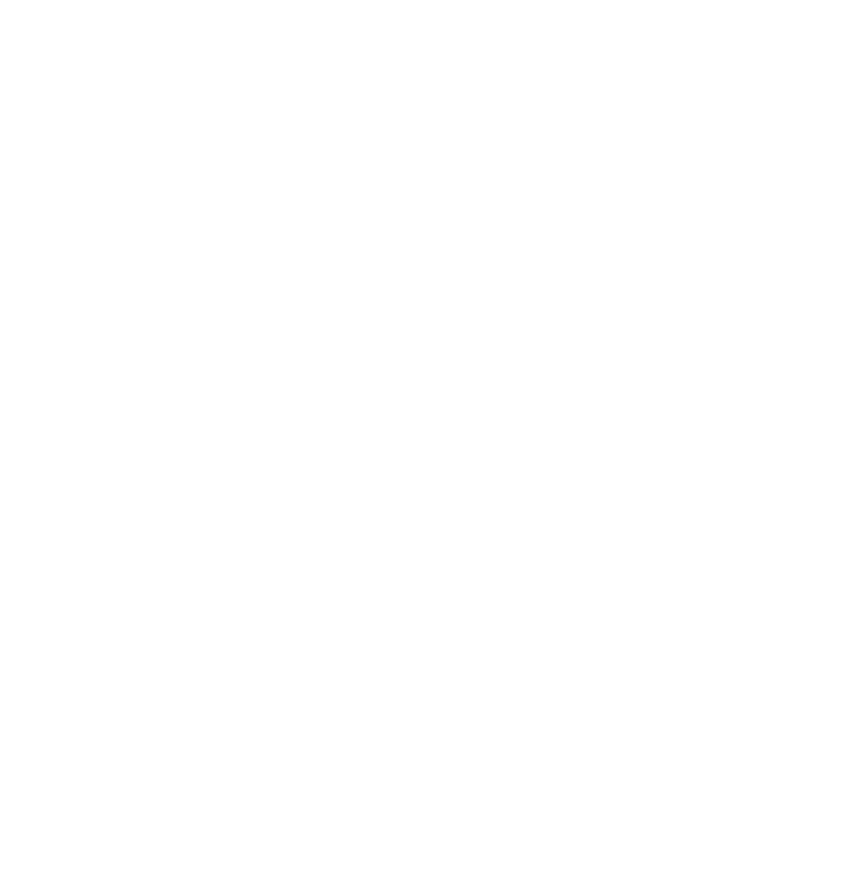

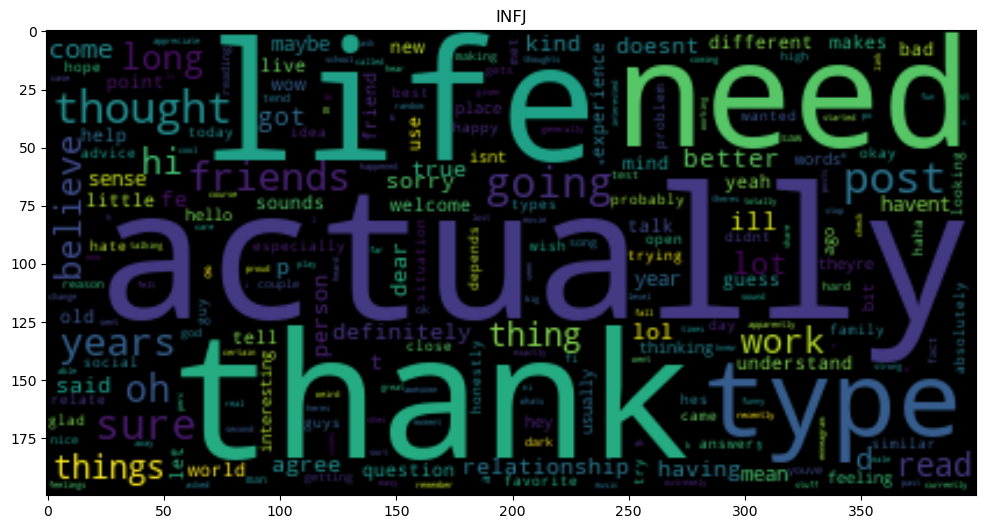

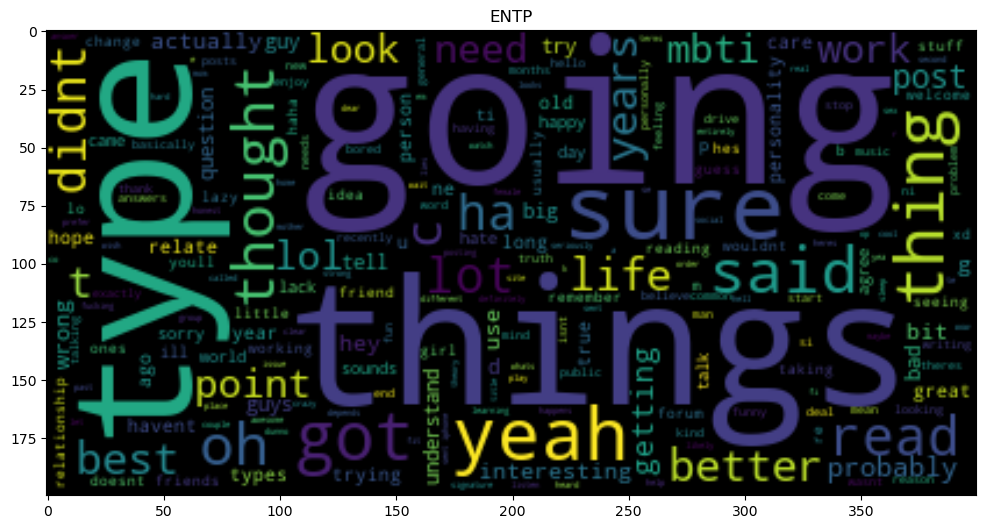

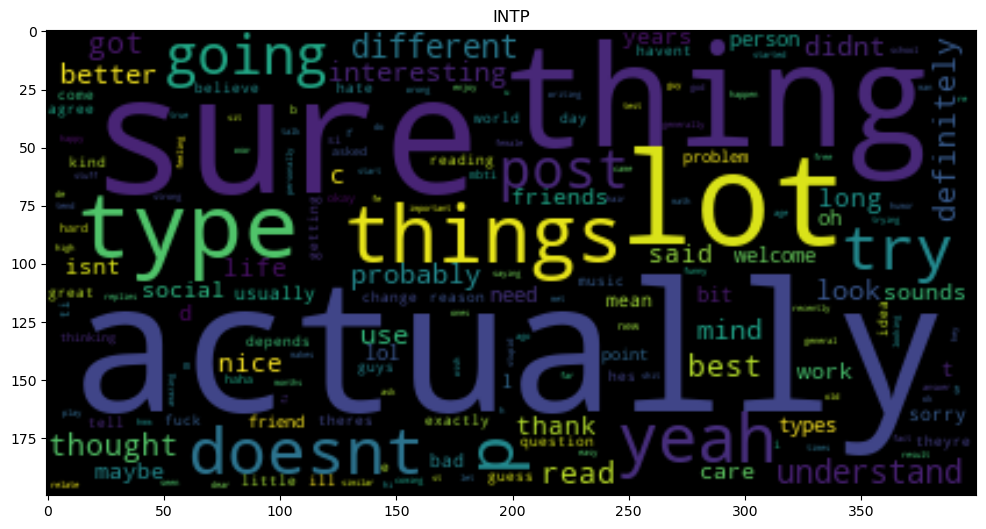

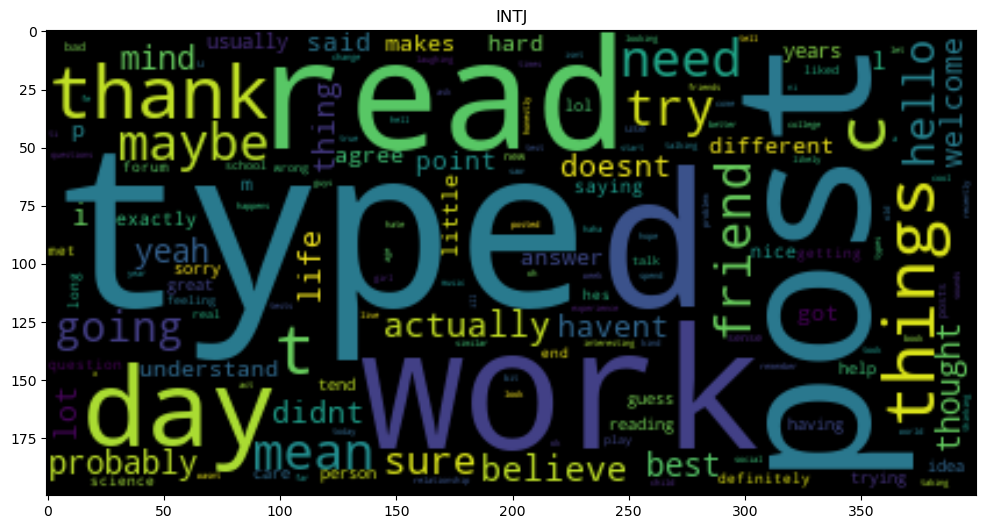

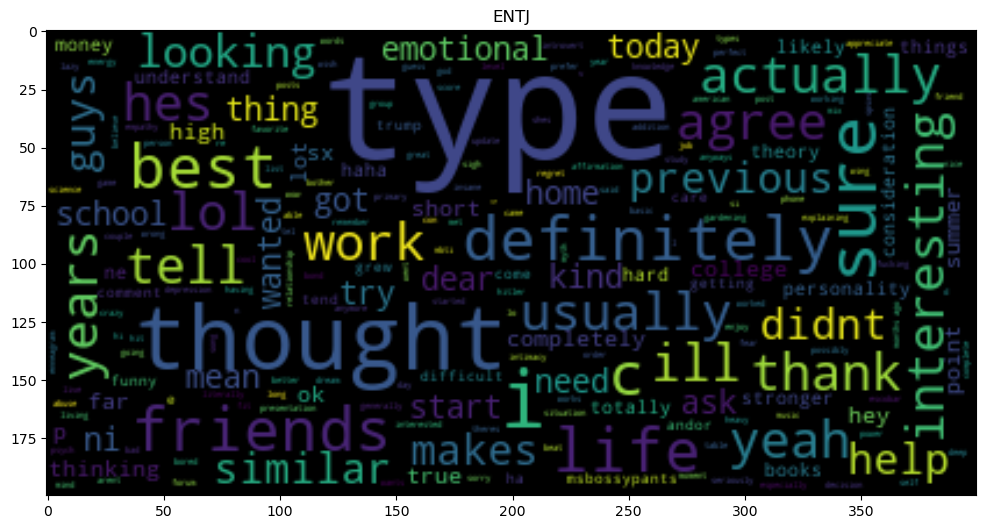

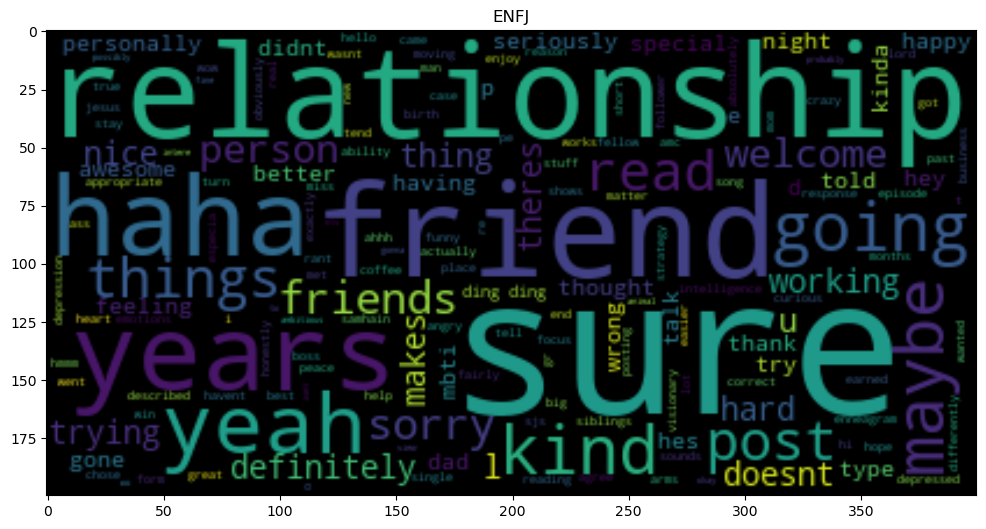

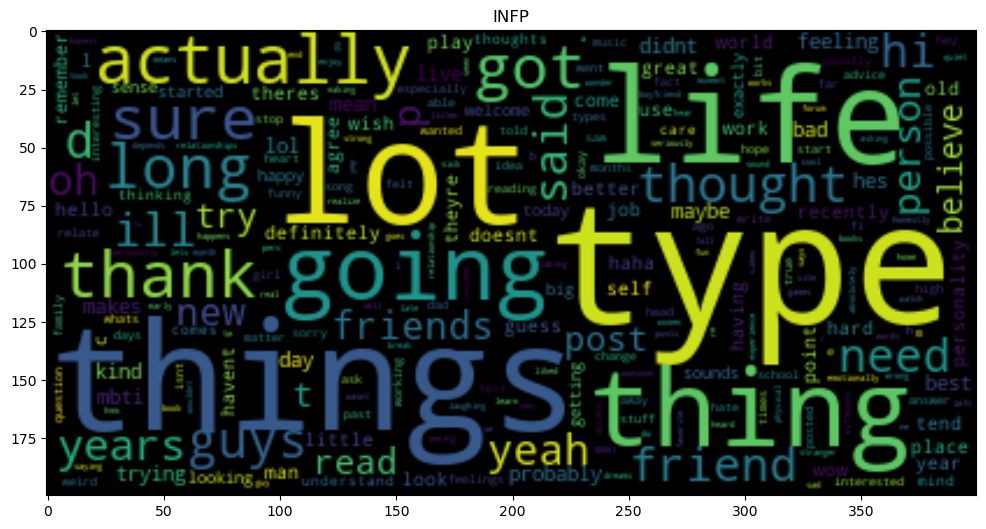

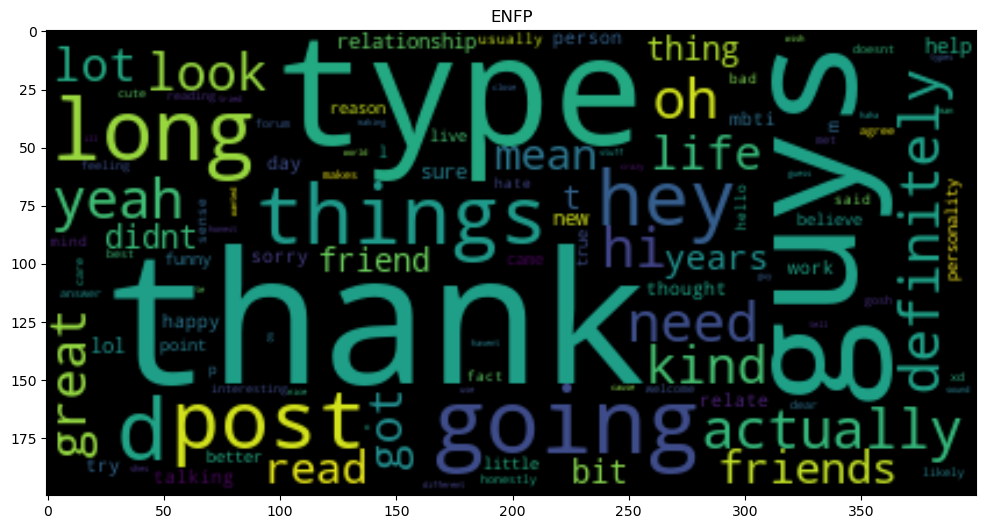

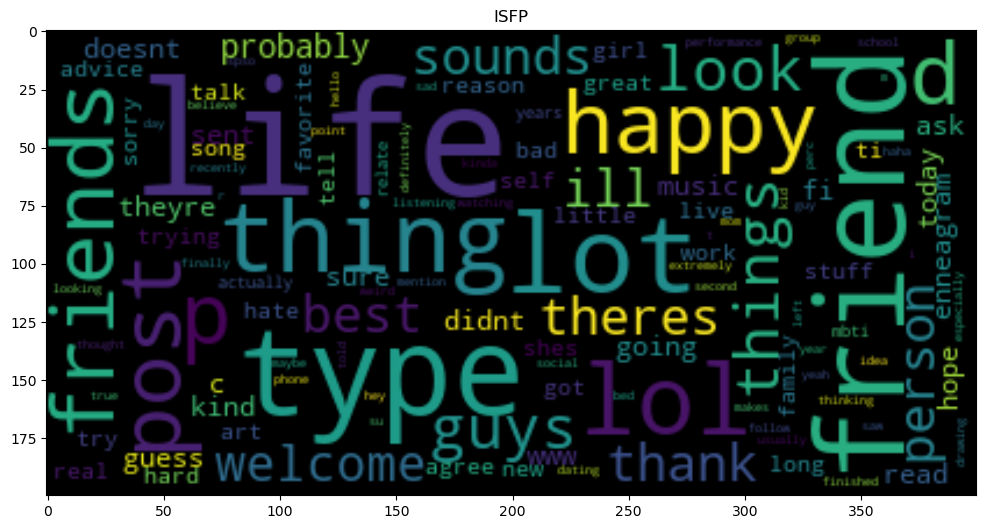

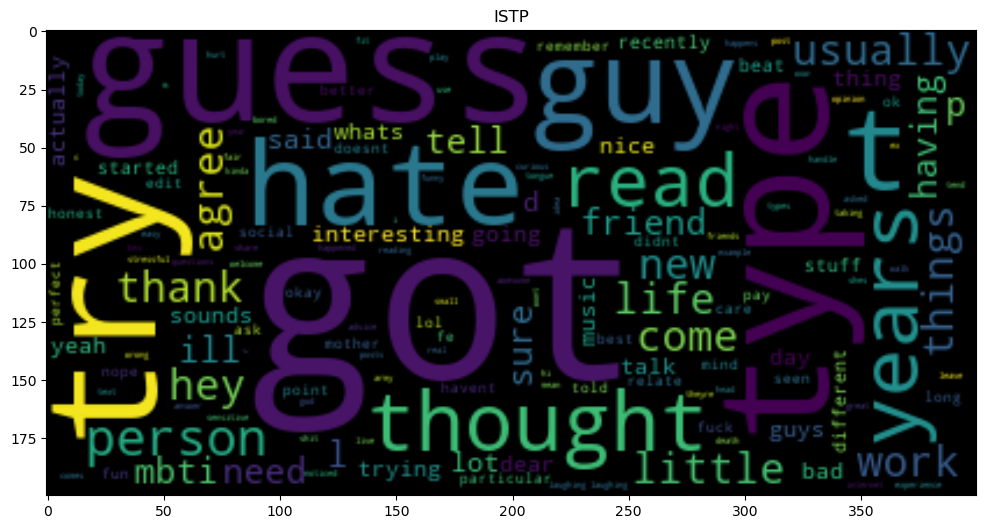

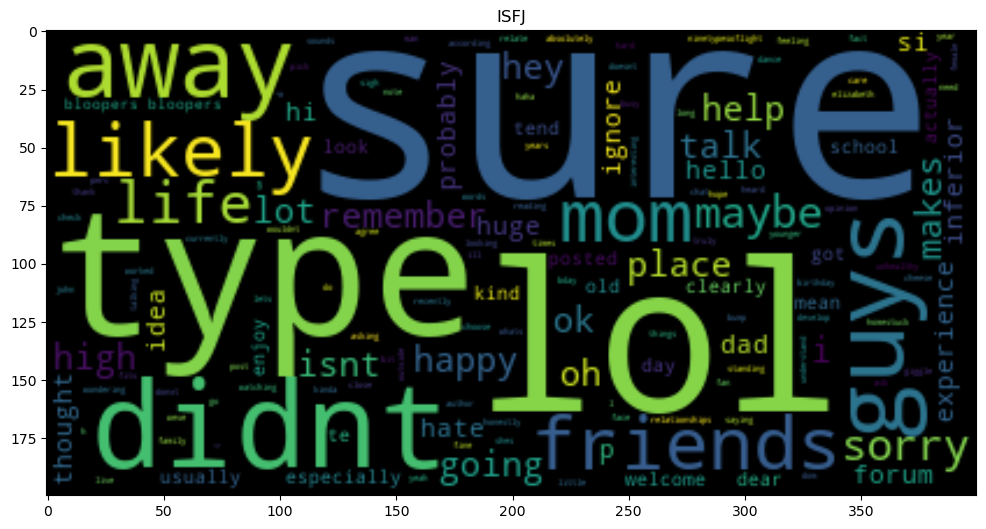

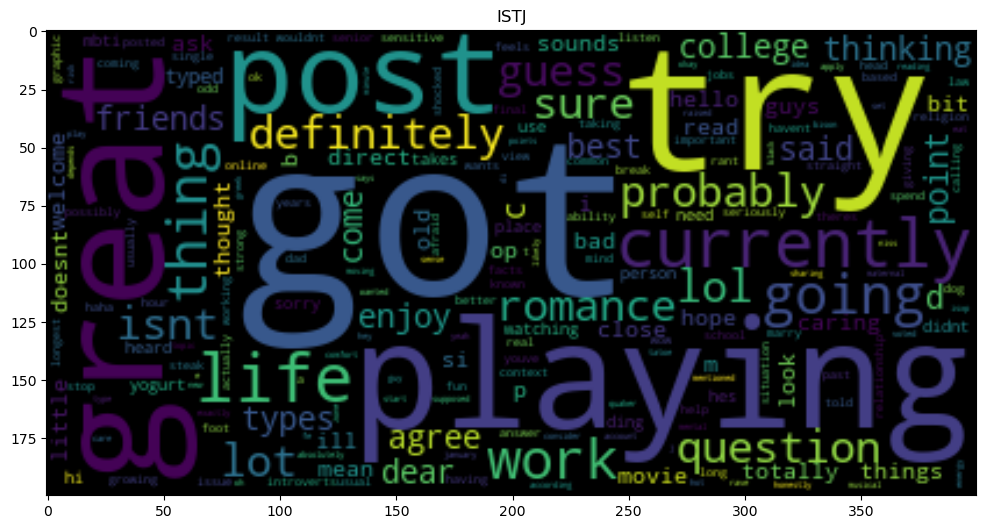

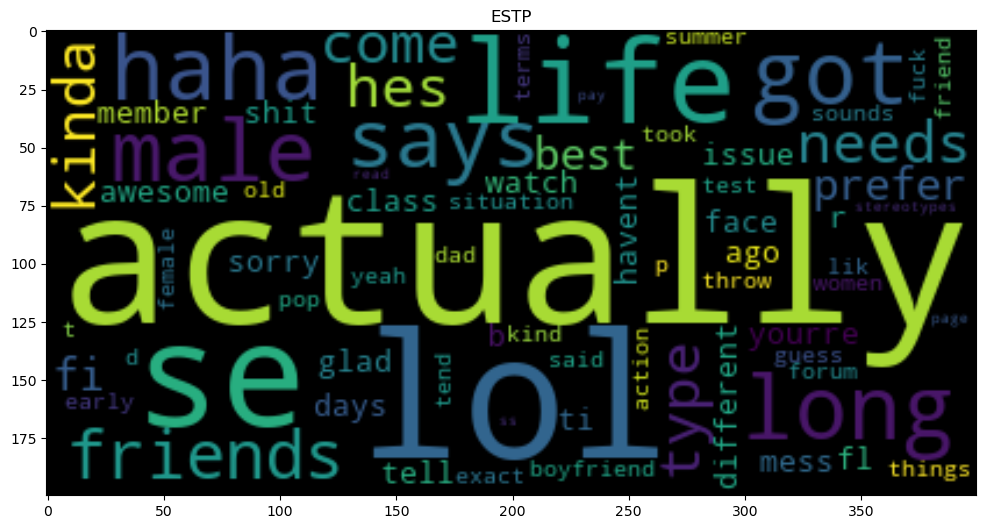

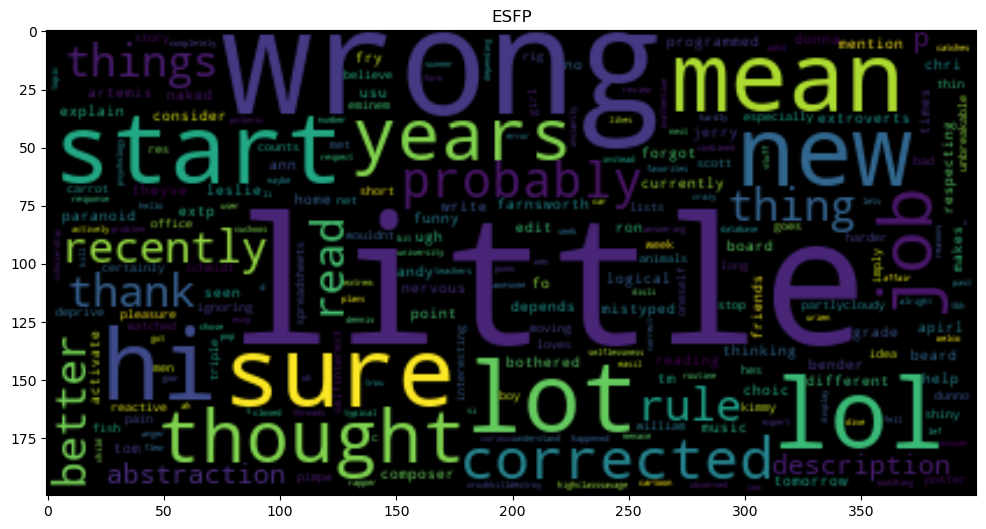

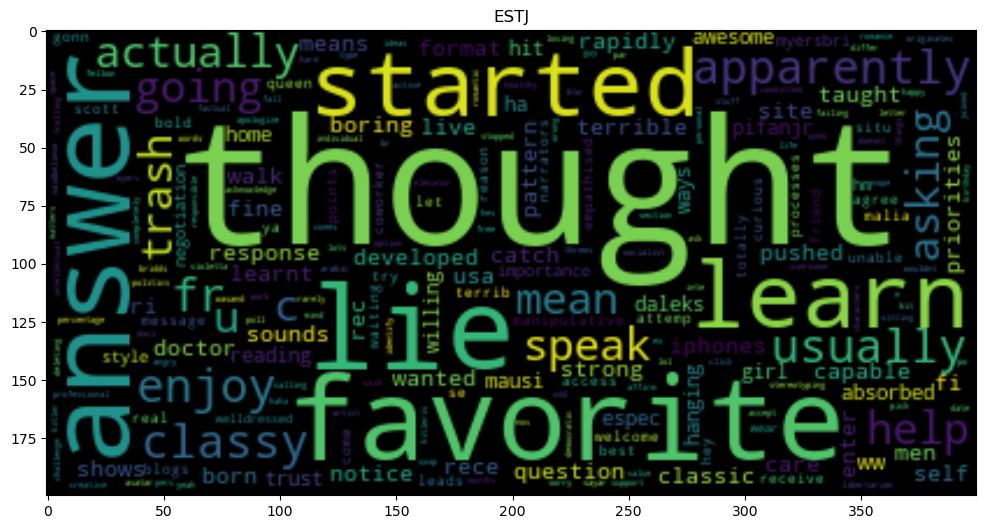

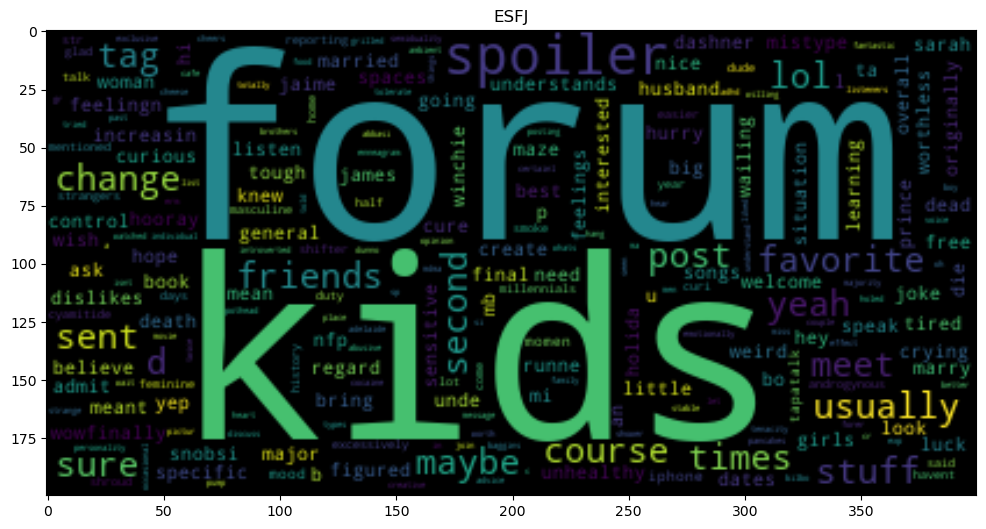

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create stopword list: stopwords = set(STOPWORDS) 
stopwords= ["im", "think", "people", "s", "dont", "like", "know", 
            "ive", "know", "yes", "feel", "time", "istp", "istps",
           "youre", "id", "w", "good", "thanks", "right", "want", 
           "love", "f", "th", "thats", "pretty", "way", "typ", "thread"]


# Generate wordcloud images for each Myers-Briggs type
fig, ax = plt.subplots(len(clean_data['type'].unique()), sharex=True, figsize=(15,len(clean_data['type'].unique())))
k = 0
for i in clean_data['type'].unique():
    df_4 = clean_data[clean_data['type'] == i]
    wordcloud = WordCloud(stopwords=stopwords, max_words=1628,
                          relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    #plt.subplot(4,4,k+1,)
    plt.subplots(dpi=100)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1
    
    fig.savefig(f"{i}.png")